# Mnist - CNN

합성곱 레이어(Convolution Neural Network Layer)와 풀링 레이어(Pooling Layer)로 구성

이미지 데이터 분석 시 높은 정답률을 냄

In [26]:
!pip install tensorflow==2.0.0

In [0]:
import tensorflow as tf

In [28]:
tf.__version__

'2.0.0'

### MNIST 데이터셋 로딩.

In [0]:
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [43]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [44]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [45]:
print('========================================')
print('X_train details')
print('========================================')
print('Rank of X_train: ',X_train.ndim)
print('len of X_train: ', len(X_train))
print('Shapeof 0th index of X_train: ',X_train[0].shape)
print('Shape of X_train: ',X_train.shape)


print()

print('========================================')
print('y_train details')
print('========================================')
print('Rank of y_train: ',y_train.ndim)
print('len of y_train: ', len(y_train))
print('Shape of y_train: ',y_train.shape)

X_train details
Rank of X_train:  3
len of X_train:  60000
Shapeof 0th index of X_train:  (28, 28)
Shape of X_train:  (60000, 28, 28)

y_train details
Rank of y_train:  1
len of y_train:  60000
Shape of y_train:  (60000,)


### MNIT 이미지 화면 출력

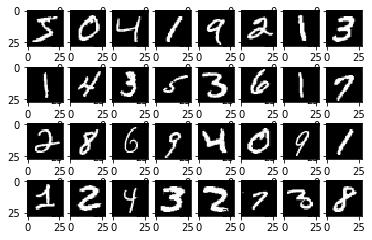

In [46]:
from matplotlib import pyplot

for i in range(0, 32):
  pyplot.subplot(4, 8, i + 1)
  pyplot.imshow(X_train[i], cmap='gray')

### 데이터 정규화, Normalization (0 < x < 1, 정수를 실수로 변환):

In [0]:
# 읽어들인 데이터를 4차원 배열로 변환하기 --- (*1a)
X_train = X_train.reshape(-1, 28, 28, 1)
X_train = X_train.astype('float32') / 255
X_test = X_test.reshape(-1, 28, 28, 1)
X_test = X_test.astype('float32') / 255

### CNN (Convolution Neural Network) 모델 작성.

In [0]:
from tensorflow.keras.models import Sequential

model = Sequential([
  tf.keras.layers.Conv2D(32, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### 모델 요약

In [52]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
flatten_1 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                216330    
Total params: 216,650
Trainable params: 216,650
Non-trainable params: 0
_________________________________________________________________


### 모델 학습과 평가하기

In [54]:
hist = model.fit(X_train, y_train, epochs=5)

# score = model.evaluate(x_test, y_test)
# score

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 30s 495us/sample - loss: 0.1831 - accuracy: 0.9470
Epoch 2/5
60000/60000 [==============================] - 30s 493us/sample - loss: 0.0703 - accuracy: 0.9792
Epoch 3/5
60000/60000 [==============================] - 29s 488us/sample - loss: 0.0516 - accuracy: 0.9844
Epoch 4/5
60000/60000 [==============================] - 30s 499us/sample - loss: 0.0382 - accuracy: 0.9882
Epoch 5/5
60000/60000 [==============================] - 30s 492us/sample - loss: 0.0295 - accuracy: 0.9907


### 약 98% 정확도로 이미지 분류 수행.
dropout 을 사용하면 overfitting 이 방지됨 (학습 시 정확도와 평가시 정확도의 차이가 적음)

In [0]:
import numpy as np

# Argmax: Returns the indices of the maximum values along an axis.
np.argmax(model.predict([[x_train[0]]]))

5

### 학습 상태를 그래프로 그리기

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')

NameError: ignored

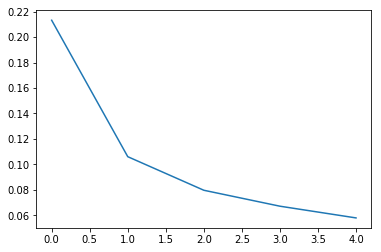

In [0]:
plt.plot(hist.history['loss'])